In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

## Dataset Option 1 (Use Your Own Toy Dataset):
- Based on your class example of predicting whether a student will pass or fail:
- Features:
    - Hours of Study
    - Sleep Hours
- Label:
    - 0 (Fail)
    - 1 (Pass)

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



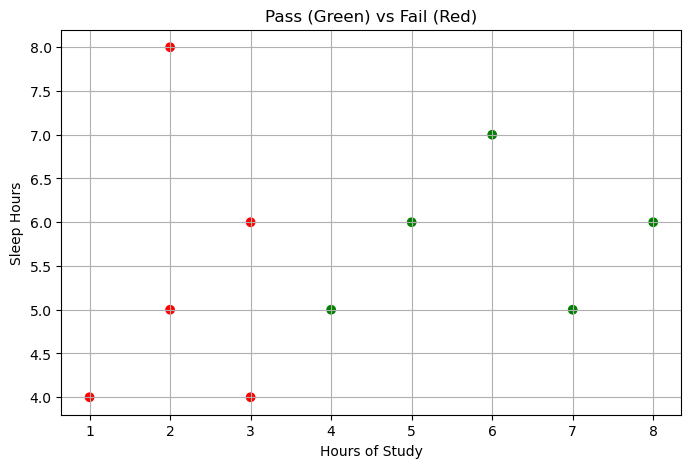

In [2]:
data = {
    'Hours_of_Study': [1, 2, 3, 4, 5, 6, 2, 3, 7, 8],
    'Sleep_Hours':    [4, 5, 6, 5, 6, 7, 8, 4, 5, 6],
    'Label':          [0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

X = df[['Hours_of_Study', 'Sleep_Hours']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 5))
colors = ['red' if label == 0 else 'green' for label in y]
plt.scatter(df['Hours_of_Study'], df['Sleep_Hours'], c=colors, label='Students')
plt.xlabel('Hours of Study')
plt.ylabel('Sleep Hours')
plt.title('Pass (Green) vs Fail (Red)')
plt.grid(True)
plt.show()

## Dataset Option 2 (Kaggle Dataset):
- You can select just two features such as:
    - math score
    - reading score
    - And label students as pass (1) or fail (0) based on a threshold.
### Tasks
### Q1. Import required libraries
- Use: numpy, pandas, tensorflow, matplotlib

In [5]:
df1 = pd.read_csv('StudentsPerformance.csv')
df1.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Q2. Create your input features (X) and output labels (y)
- Use either your own toy dataset or the Kaggle dataset.

In [6]:
X = df1[['math score', 'reading score']]

y = ((df1['math score'] >= 50) & (df1['reading score'] >= 50)).astype(int)

### Q3. Build a Single Layer Perceptron using Keras Sequential API
- Use:
  - 1 output layer
  - Sigmoid activation
  - input_dim=2 if two features are used
  - model = Sequential() model.add(Dense(1, activation='sigmoid', input_dim=2))

In [10]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=2))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### Q4. Compile the model Use:
- Optimizer: adam
- Loss: binary_crossentropy
- Metrics: accuracy

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Q5. Train the model for 10–15 epochs
- model.fit(X, y, epochs=15, verbose=0)

In [12]:
model.fit(X, y, epochs=15, verbose=0)
print("Model training completed.")

Model training completed.


### Q6. Test the model on a few new data points Create a few input samples and predict their output using:
- model.predict(new_data)

In [14]:
import numpy as np
new_data = np.array([
    [55, 60],   # Likely Pass
    [40, 45],   # Likely Fail
    [70, 80],   # Likely Pass
    [50, 49],   # Borderline (Fail)
    [30, 70]    # Possibly Fail
])

predictions = model.predict(new_data)

for i, prob in enumerate(predictions):
    label = int(prob >= 0.5) 
    print(f"Student {i+1}: Predicted Probability = {prob[0]:.2f} → Class = {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Student 1: Predicted Probability = 1.00 → Class = 1
Student 2: Predicted Probability = 1.00 → Class = 1
Student 3: Predicted Probability = 1.00 → Class = 1
Student 4: Predicted Probability = 0.96 → Class = 1
Student 5: Predicted Probability = 1.00 → Class = 1


### Q7. Optional Bonus – Visualize Activation Functions Plot the graphs for:
- Sigmoid Tanh ReLU
- Use numpy and matplotlib to visualize them.

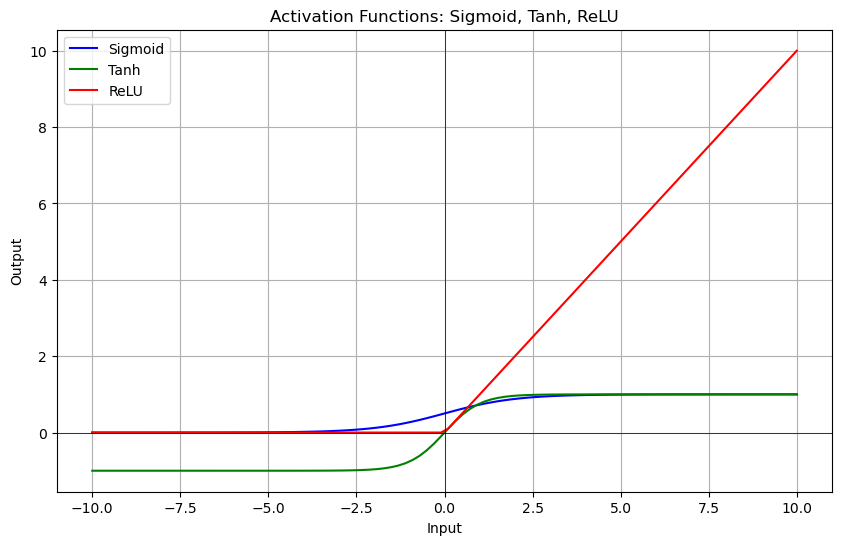

In [16]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)
plt.figure(figsize=(10, 6))

plt.plot(x, sigmoid, label='Sigmoid', color='blue')

plt.plot(x, tanh, label='Tanh', color='green')

plt.plot(x, relu, label='ReLU', color='red')

plt.title('Activation Functions: Sigmoid, Tanh, ReLU')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()